# Microsoft Movie Analysis

**Author:** Cindy Reiner

![picture of movie theater](images/cinemas-by-nathan-engel.png)

## Overview

This project analyzes the inital steps needed to get the software company, Microsoft, started in the movie industry. Movie data from The Movie Database (TMDB) shows that movies with budgets of \\$37 million and less are more likely to have a high return on investment (ROI), than high movies with higher budgets. Of movies with budgets of \\$37 million and less, Documentaries are the most likely to have a high ROI. There are 9 directors in Internet Movie Database (IMDB) who have had at least 2 popular documentaries in the last ten years; Alex Gibney, Sam Dunn, Scot McFadyen, Fisher Stevens, Adam Curtis, Peter Mortimer, Joshua Oppenheimer, Josh Lowell, and Boris Malagurski. This initial analysis of movie data will give Microsoft direction in deciding the budget, genre and director for their first movie.<img alt="picture of man with video camera" src="images/camera.png" width="150"/>


## Business Problem    

As a company who is hoping to break into the movie business, Microsoft will need to first focus on the questions most relevent to getting started. Among the initial analysis needed are the questions of budget, genre of movie, and director. These all need to be decided in the first steps of creating/planning the first movie. I believe we should focus on starting small with a high return on investment so the company can grow to a point where it can take more risks. 

## Data Understanding

This project uses two datasets. The first one was obtained from [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and contains 5000 movies from The Movie Database. It includes movie titles, budgets, revenues, vote averages and numbers, genres, languages, keywords and release dates. For this dataset, I am mostly interested in the budgets, revenues and genres of the movies to determine what budgets and genres have the highest return on investment.

The second dataset is a combination of several datasets from IMDB. The IMDB datasets include movie titles, release dates, genres, average ratings, writers and directors.  In this dataset, I will use the movie genres, ratings, and directors.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Import data
tmdb_df = pd.read_csv('data/tmdb_5000_movies.csv.zip')
title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')
title_rating_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')
title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz', compression = 'gzip')
name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')

In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
title_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [8]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


### The Movie Database (TMDB)
This dataset includes movies with release dates from 1916-2017 along with their budget, revenue, genres, and popularity.

In [9]:
tmdb_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124


In [10]:

tmdb_df['release_date'] =  pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].describe()

count                    4802
unique                   3280
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

In [11]:
tmdb_df['budget'].describe()

count        4803.00
mean     29045039.88
std      40722391.26
min             0.00
25%        790000.00
50%      15000000.00
75%      40000000.00
max     380000000.00
Name: budget, dtype: float64

In [12]:
tmdb_df['revenue'].describe()

count         4803.00
mean      82260638.65
std      162857100.94
min              0.00
25%              0.00
50%       19170001.00
75%       92917187.00
max     2787965087.00
Name: revenue, dtype: float64

In [13]:
tmdb_df['popularity'].describe()

count   4803.00
mean      21.49
std       31.82
min        0.00
25%        4.67
50%       12.92
75%       28.31
max      875.58
Name: popularity, dtype: float64

### IMDB Datasets
There are four IMDB datasets that will be joined together for this analysis. The first is the basics, which includes title, genres and year for movies released in 2010 and later. The ratings data set contains ratings and number of ratings. The title crew data has unique IDs for both movies and writer and director names to provide a link between the basics dataset and the names data, which contains the names of writers and directors as well as their unique IDs.

In [14]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [15]:
title_basics_df['start_year'].describe()

count   146144.00
mean      2014.62
std          2.73
min       2010.00
25%       2012.00
50%       2015.00
75%       2017.00
max       2115.00
Name: start_year, dtype: float64

In [16]:
title_rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [17]:
title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [18]:
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


## Data Preparation

### TMDB dataset
##### Data Cleaning
To prepare the tmdb dataset for analysis, I drop unneeded columns. I plan to use this data to analyze movie budgets, revenue, and genres. To eliminate issues of of inflation and changing public interests, I also limit the data to movies that were released in 2000 or later. Finally, I drop films without budget and revenue data.

In [19]:
#drop columns I know I won't be using
tmdb_df = tmdb_df.drop(columns = 
                       ['homepage', 'original_title', 'status', 'tagline', 'original_language', 
                        'spoken_languages', 'overview', 'production_countries']
                      )

In [20]:
#limit data movies made since 2000
tmdb_df = tmdb_df.loc[tmdb_df['release_date'] > '1999-12-31']

In [21]:
#drop films without budget data
tmdb_df = tmdb_df.loc[tmdb_df['budget'] != 0]
#remove films without revenue data
tmdb_df = tmdb_df.loc[tmdb_df['revenue'] != 0]

##### Feature Engineering
I create a column for return on investment (ROI) using the revenue and budget columns and convert dictionary columns to lists. I also write a function to use in the analysis that will take a database with a genres column and return a series with the number of movies in each genre present in the database.

In [22]:
#add column for ROI
tmdb_df['roi'] = tmdb_df['revenue'] / tmdb_df['budget']

In [23]:
#reorder columns to make them easier to use
tmdb_df = tmdb_df[
    ['budget', 'revenue', 'roi', 'title', 'release_date', 'genres', 'keywords', 'vote_average', 
     'vote_count', 'popularity', 'production_companies', 'runtime', 'id']]

The genres and keyword columns look like dictionaries, but are actually strings that look like dictionaries. This function first converts the strings to dictionaries, then extracts the values for the 'name' key into a list of genres or keywords.

In [24]:
#function that will turn each string/dictionary column into lists
import ast
def str_dict_to_list(column, dataframe) :
    '''
    returns the column as a list of the values for the 'name' key
    
    Parameters:
        column: str
            column that is a string that looks like a dictionary and has a 'name' key
        dataframe 
            dataframe the contains a column fitting the above description
    Returns:
         dataframe 
             same dataframe with string/dictionary column as list of values for the 'name' keys
    '''
    names_list = []
    for row in dataframe.index:
        # first need to convert the strings to dictionarys!
        str_to_dict = ast.literal_eval(dataframe[column][row])
        #create list of values from key "name"
        names_list = [name.get("name") for name in str_to_dict]
        #replace the column value with the new list
        dataframe[column][row] = names_list
    return dataframe

In [25]:
# call function on genre, keyword, and production company columns of tmdb_df
str_dict_to_list('genres', tmdb_df)
str_dict_to_list('keywords', tmdb_df)
str_dict_to_list('production_companies', tmdb_df)
tmdb_df.head(3)

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,popularity,production_companies,runtime,id
0,237000000,2787965087,11.76,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",7.20,11800,150.44,"[Ingenious Film Partners, Twentieth Century Fo...",162.00,19995
1,300000000,961000000,3.20,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",6.90,4500,139.08,"[Walt Disney Pictures, Jerry Bruckheimer Films...",169.00,285
2,245000000,880674609,3.59,Spectre,2015-10-26,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",6.30,4466,107.38,"[Columbia Pictures, Danjaq, B24]",148.00,206647


### IMDB Datasets
##### Data Cleaning

To clean the data, I drop columns that are not needed from the 'basics' dataframe, fill null values with 'unknown' and separated columns that are strings containing lists into lists.

In [26]:
#drop unneeded columns
title_basics_df.drop(columns=['original_title', 'runtime_minutes'], inplace = True)

In [27]:
#fill nulls in title_basics genre column with 'unknown'
title_basics_df['genres'] = title_basics_df['genres'].fillna('unknown')
#split genres column into lists
title_basics_df['genres'] = [x.split(',') for x in title_basics_df['genres']]

In [28]:
#fill nulls in title_crew 'directors' column with 'unknown'
title_crew_df['directors'] = title_crew_df['directors'].fillna('unknown')
#split directors column into lists
title_crew_df['directors'] = [x.split(',') for x in title_crew_df['directors']]

In [29]:
#fill nulls in name_basics 'primary_profession' and 'known_for_titles' columns with 'unknown'
name_basics_df['primary_profession'] = name_basics_df['primary_profession'].fillna('unknown')
name_basics_df['known_for_titles'] = name_basics_df['known_for_titles'].fillna('unknown')
#split primary_profession and known_for_titles columns in name basics into lists
name_basics_df['known_for_titles'] = [x.split(',') for x in name_basics_df['known_for_titles']]
name_basics_df['primary_profession'] = [x.split(',') for x in name_basics_df['primary_profession']]

##### Merging Datasets
These datasets merge easily using the 'tconst' columns. The basics and crew datasets have the same number of entries, while the ratings dataset has fewer entries. I use an inner join to exclude movies that do not have rating information.

In [30]:
imdb_df = title_basics_df.merge(title_rating_df, on = 'tconst')

In [31]:
imdb_df = imdb_df.merge(title_crew_df, on = 'tconst')

##### Feature Engineering
The dataset containing the names of the directors does not merge easily with the other imdb datasets. Instead, I create a dictionary of the names and 'nconst' from the names data set and use list comprehension to add the director names as a new column on the imdb dataset.

In [32]:
#create a dictionary of nconsts and names
director_dict = dict(zip(list(name_basics_df['nconst']), list(name_basics_df['primary_name'])))
# then create the column and add the names using list comprehension
imdb_df = imdb_df.assign(dir_names=[
    [director_dict[k] for k in row if director_dict.get(k)] for row in imdb_df['directors']
])

In [33]:
imdb_df.head()

,tconst,primary_title,start_year,genres,averagerating,numvotes,directors,writers,dir_names
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.00,77,[nm0712540],"nm0023551,nm1194313,nm0347899,nm1391276",[Harnam Singh Rawail]
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]",7.20,43,[nm0002411],NaN,[Mani Kaul]
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.90,4517,[nm0000080],"nm0000080,nm0462648",[Orson Welles]
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.10,13,[nm0611531],nm0347899,[Hrishikesh Mukherjee]
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]",6.50,119,"[nm0765384, nm0749914]","nm1360635,nm0749914","[Valeria Sarmiento, Raoul Ruiz]"


## Data Modeling


### Budget
To make a budget recommendation, I examine the relationship between return on investment (ROI) and budget. I first look at a scatter plot of ROI vs Budget to see what ROI would be considered to be high, and what budget those high ROI movies have. There are some outliers in the ROI data, with a very high ROI, so I also plot a zoomed in version to see the transition between high budget/low ROI and low budget/high ROI.

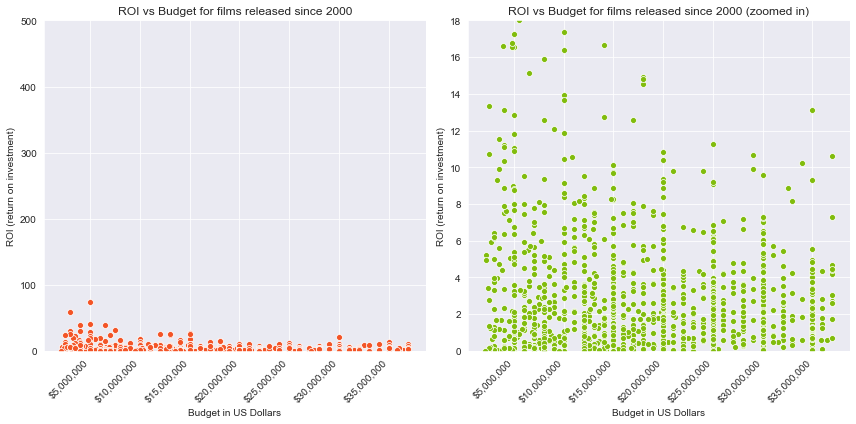

In [58]:
# Plot ROI vs Budgets
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
import matplotlib as mpl


budget = tmdb_df['budget']
roi = tmdb_df['roi']

sns.scatterplot(x = budget, y = roi, ax=ax[0], color = '#F35426')
sns.scatterplot(x = budget, y = roi, ax=ax[1], color = '#81BC0D')

ax[0].ticklabel_format(style='plain', axis='x')
ax[0].set_title('ROI vs Budget for films released since 2000')
ax[0].set_ylabel('ROI (return on investment)')
ax[0].set_xlabel('Budget in US Dollars')
ax[0].set_ylim(0, 500)
ax[0].set_xticklabels(['${:,}'.format(int(x)) for x in ax[0].get_xticks()], rotation=45, ha='right')

ax[1].ticklabel_format(style='plain', axis='x')
ax[1].set_title('ROI vs Budget for films released since 2000 (zoomed in)')
ax[1].set_ylabel('ROI (return on investment)')
ax[1].set_xlabel('Budget in US Dollars')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylim(0, 18)
ax[1].set_xticklabels(['${:,}'.format(int(x)) for x in ax[1].get_xticks()], rotation=45, ha='right')

plt.tight_layout()
plt.savefig("./images/roivbudget.png", dpi=150)
plt.show()

This shows that lower budget movies tend to have the highest ROI. Based on these graphs, I decided on an ROI of 6 as a mid point to separate the high ROI movies from the low ROI movies. It also looks like extremely low budget movies will skew any budget analysis, so I will next look at the budget distributions of the high and low ROI movies that have a budget over $2 million.

In [35]:
# limit data to budgets over $2 million
tmdb_df = tmdb_df[tmdb_df['budget'] > 2000000]

In [36]:
#add column to indicate high or low ROI
tmdb_df.loc[tmdb_df['roi']<6, 'roi_type'] = 'low'
tmdb_df.loc[tmdb_df['roi']>=6, 'roi_type'] = 'high'

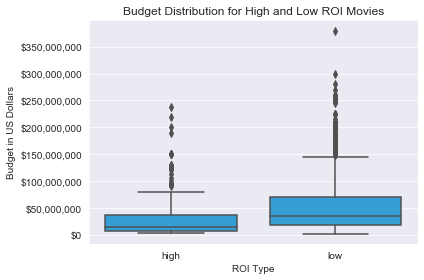

In [37]:
# use a box plot to look at the budget distribution of the high and low roi datasets
fig, ax = plt.subplots(1,1)
sns.boxplot(y = tmdb_df['budget'], x=tmdb_df['roi_type'], color = '#1AA7F0')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Budget Distribution for High and Low ROI Movies')
plt.ylabel('Budget in US Dollars')
plt.xlabel('ROI Type')
ax.set_yticklabels(['${:,}'.format(int(y)) for y in ax.get_yticks()])

plt.tight_layout()
plt.savefig("./images/budgetvROItype.png", dpi=150)
plt.show()

In [38]:
tmdb_df[['roi_type', 'budget']].groupby(['roi_type']).describe()

budget                                                             \
           count        mean         std        min         25%         50%   
roi_type                                                                      
high      241.00 31986971.06 40229509.00 2500000.00  7500000.00 15000000.00   
low      1923.00 51415948.79 48900511.19 2100000.00 18000000.00 35000000.00   

                                   
                 75%          max  
roi_type                           
high     37000000.00 237000000.00  
low      69500000.00 380000000.00

Movies with a high ROI have lower budgets overall, though there is considerable overlap. For the purposes of Microsoft's first movie project, I would recommend keeping in the inner quartile range of of the high ROI data, \\$7.5-37 million. For the rest of the analysis for the TMDB data, I will compare lower budget movies (\\$37 million and less) to see what differences there are between those that have a high ROI and those that have a low ROI.

In [39]:
# limiting data to movies with budget equal to or below $37 million
tmdb_df = tmdb_df[tmdb_df['budget']<=37000000]

### Genre
To answer the question of what type of movie Microsoft should make, I compare the number of movies of each genre between the low and high ROI movies. 

In [40]:
#function that will take a dataframe with a genres column 
#and return a series with genres and number of movies in that genre
def creategenreinfoseries(dataframe):
    '''
    return a series with the genres and number of rows containing the genre
    
    Parameters:
        dataframe 
            dataframe that contains a 'genres' column 
    Returns:
         series 
             index is the genre names, column is number of rows/movies with that genre
    '''
    df = fillgenres(creategenrecols(genrelistfromDF(dataframe), genreDF(dataframe)), genrelistfromDF(dataframe))
    return dropandsum(df)

def dropandsum(dataframe):
    #drops the 'genres' column used to fill the dataframe, then sums the rows for each genre column
    dataframe.drop(columns = ['genres'], inplace = True)
    return dataframe.sum()

def fillgenres(dataframe, _list):
    #fills in a dataframe (will use the one created in creategencols()) based on the list in it's ['genres'] column
    for row in dataframe.index:
        for genre in _list:
            if genre in dataframe['genres'][row]:
                dataframe[genre][row]  = 1
    return dataframe

def creategenrecols(_list, dataframe):
    #create columns from a list (will use the one created with genrelistfromDF()) 
    #in a dataframe (will use one created with genreDF())
    for col in _list:
        dataframe[col] = 0
    return dataframe
    
def genrelistfromDF(dataframe):
    #create and return a list of genres present in the argument
    genre_list = sorted(set(dataframe['genres'].sum()))
    return genre_list

    
def genreDF(dataframe):
    #create and return a dataframe from the genres series of the argument
    genre_df = pd.DataFrame(dataframe['genres'])
    return genre_df

In [41]:
#use the creategenreinfoseries function to create series with genres and 
#number of movies in the high and low ROI movie types
high_roi = creategenreinfoseries(tmdb_df[tmdb_df['roi_type'] == 'high'])
low_roi = creategenreinfoseries(tmdb_df[tmdb_df['roi_type'] == 'low'])
#change the series to a dataframe
high_roi = pd.DataFrame(high_roi, columns = ['number_of_movies'])
low_roi = pd.DataFrame(low_roi, columns =['number_of_movies'])
#merge the high and low roi dataframes
genre_numbers = high_roi.reset_index().merge(
    low_roi.reset_index(), on = 'index', suffixes = ('_high_roi', '_low_roi'))
#create a column with the percent of high roi movies in each genre
genre_numbers['percent_high_roi'] = genre_numbers['number_of_movies_high_roi']/(
    genre_numbers['number_of_movies_high_roi']+genre_numbers['number_of_movies_low_roi'])

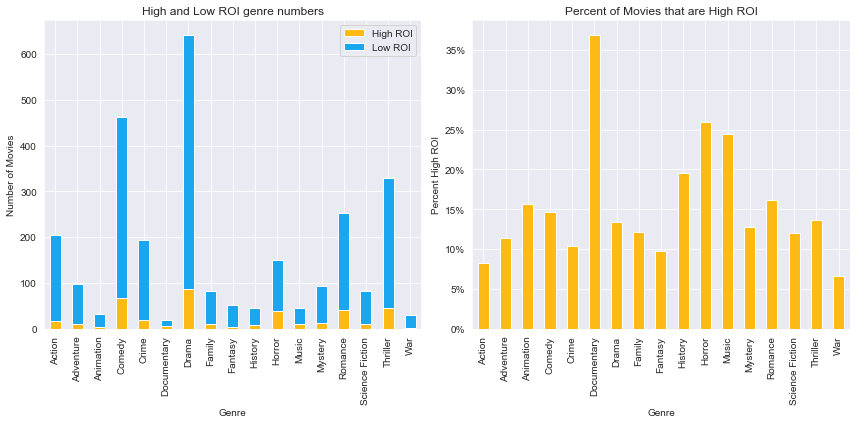

In [56]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
colours=('#FDBA15', '#1AA7F0' )
genre_numbers.reset_index().plot(
    x="index", y=["number_of_movies_high_roi", "number_of_movies_low_roi"], 
    kind="bar", stacked = True, ax = ax[0], color=colours
)
genre_numbers.reset_index().plot(
    x="index", y=["percent_high_roi"], kind="bar", ax = ax[1], color = '#FDBA15', legend=False
)

ax[0].set_title("High and Low ROI genre numbers")
ax[0].set_xlabel("Genre")
ax[0].set_ylabel("Number of Movies")
ax[0].legend(['High ROI', 'Low ROI'], loc = 'upper right')

ax[1].set_title("Percent of Movies that are High ROI")
ax[1].set_xlabel("Genre")
ax[1].set_ylabel("Percent High ROI")
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1,0))

plt.tight_layout()
plt.savefig("./images/highROIgenres.png", dpi=150)
plt.show()

The genres, Documentary, History, Horror and Music, are the mostly likely to be in the high roi group for this budget range. I think that Microsoft could make some great Documentary films and will use this genre to look for possible Directors.

### Director
To find possible directors, I use the IMDB dataset. It does not contain budget or revenue data. To identify another metric to analyze director data, I compare the popularity and vote average of the high and low ROI movie groups.

In [43]:
tmdb_df[['roi_type', 'popularity']].groupby(['roi_type']).describe()

popularity                                          
              count  mean   std  min   25%   50%   75%    max
roi_type                                                     
high         182.00 37.73 24.50 0.30 20.31 32.75 49.11 145.36
low         1017.00 18.99 15.31 0.02  8.24 15.28 25.85 192.53

In [44]:
tmdb_df[['roi_type', 'vote_average']].groupby(['roi_type']).describe()

vote_average                                   
                count mean  std  min  25%  50%  75%  max
roi_type                                                
high           182.00 6.55 0.81 4.10 6.10 6.50 7.20 8.30
low           1017.00 6.16 0.87 0.00 5.70 6.20 6.70 8.30

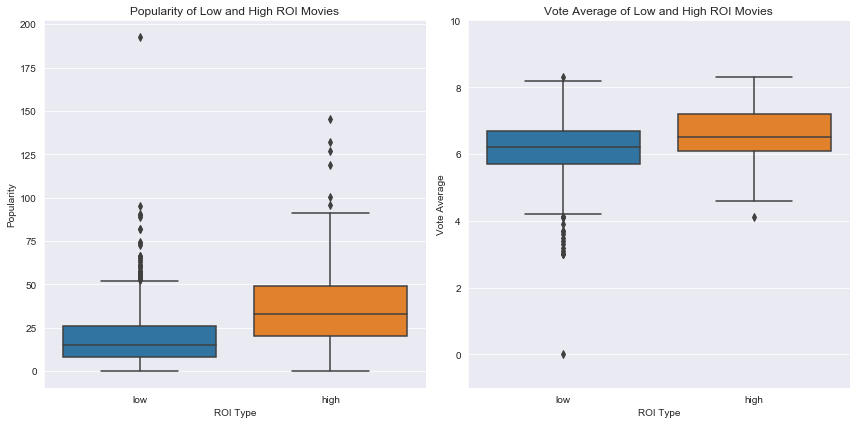

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))

sns.boxplot(y = tmdb_df['popularity'], x=tmdb_df['roi_type'], ax=ax[0])
sns.boxplot(y = tmdb_df['vote_average'], x=tmdb_df['roi_type'], ax = ax[1])

ax[0].set_title("Popularity of Low and High ROI Movies")
ax[0].set_xlabel("ROI Type")
ax[0].set_ylabel("Popularity")

ax[1].set_title("Vote Average of Low and High ROI Movies")
ax[1].set_xlabel("ROI Type")
ax[1].set_ylabel("Vote Average")
ax[1].set_ylim(-1, 10)

plt.tight_layout()
plt.savefig('./images/popularitybyROI', dpi=150)
plt.show()

The higher ROI movies tend to be more popular and have a higher vote average than the lower ROI movies. I will used this information to look for popular documentary directors in the IMDB dataset.

In [46]:
#limit the data to Documentaries
documentaries = imdb_df[imdb_df['genres'].apply(lambda x: 'Documentary' in x)]

In [47]:
#look at distribution of ratings and number of votes for documentaries
documentaries.describe()

,start_year,averagerating,numvotes
count,17753.00,17753.00,17753.00
mean,2014.13,7.33,266.96
std,2.55,1.09,1871.78
min,2010.00,1.00,5.00
25%,2012.00,6.70,9.00
50%,2014.00,7.40,19.00
75%,2016.00,8.00,67.00
max,2019.00,10.00,74978.00


In [48]:
#To find the most popular documetaries, I looked only at movies with at least 1000 votes and an average rating over 8
pop_documentaries = documentaries[(documentaries['numvotes']>=1000)&(documentaries['averagerating']>=8)]

In [49]:
#To look at directors in these movies, I want to use the creategenreinfoseries function
#the information to be added to the new DF needs to be in the genres column, so making changes to column names
pop_documentaries['original_genres'] = pop_documentaries['genres']
pop_documentaries['genres'] = pop_documentaries['directors']

In [50]:
pop_directors = creategenreinfoseries(pop_documentaries)

In [51]:
#find directors with at least 2 movies in the most popular documentaries
pop_directors = pop_directors.reset_index()
pop_directors = pop_directors[pop_directors[0] > 1]

In [52]:
#use the list to match the directors to the name basics df to see who they are
popdirector_list = list(pop_directors['index'])
doc_directors = name_basics_df.loc[name_basics_df['nconst'].isin(popdirector_list)]

In [53]:
doc_directors.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
514,nm0316795,Alex Gibney,1953.00,nan,"[producer, director, writer]","[tt3626440, tt4257858, tt0854678, tt1016268]"
2235,nm0242757,Sam Dunn,nan,nan,"[producer, director, writer]","[tt6319696, tt0478209, tt3228830, tt1545103]"
20260,nm1083864,Scot McFadyen,nan,nan,"[producer, music_department, director]","[tt6319696, tt1545103, tt3228830, tt0478209]"
35376,nm0001770,Fisher Stevens,1963.00,nan,"[actor, producer, director]","[tt0113243, tt0211933, tt0108255, tt0091949]"
110321,nm0193231,Adam Curtis,1955.00,nan,"[director, producer, writer]","[tt0437029, tt6156350, tt0430484, tt4393514]"


In [54]:
#use the "known_for_titles" column to create a new column with names of movies the directors are known for
movie_dict = dict(zip(list(imdb_df['tconst']), list(imdb_df['primary_title'])))
doc_directors = doc_directors.assign(titles=[[movie_dict[k] for k in row if movie_dict.get(k)] for row in doc_directors['known_for_titles']])

In [55]:
pd.set_option('display.max_colwidth', -1)
doc_directors[['primary_name', 'titles']]

,primary_name,titles
514,Alex Gibney,"[Mr. Dynamite: The Rise of James Brown, Going Clear: Scientology & the Prison of Belief]"
2235,Sam Dunn,"[Super Duper Alice Cooper, Rush: Beyond the Lighted Stage]"
20260,Scot McFadyen,"[Rush: Beyond the Lighted Stage, Super Duper Alice Cooper]"
35376,Fisher Stevens,[]
110321,Adam Curtis,"[HyperNormalisation, Bitter Lake]"
116468,Peter Mortimer,"[Valley Uprising, The Dawn Wall]"
139579,Joshua Oppenheimer,"[The Look of Silence, The Act of Killing]"
200770,Josh Lowell,"[Valley Uprising, The Dawn Wall]"
246161,Boris Malagurski,"[The Weight of Chains, The Weight of Chains 2, Kosovo: A Moment In Civilization]"


## Evaluation

I am confident that, given the data available, the budget and genre data is accurate and a great place to start in the movie business. However, the director data is more subjective with ratings and number of ratings on IMDB as the determining factor. 


## Conclusions

**This analysis leads to three recommendations for Microsoft's first movie:**
* Aim for a budget in the range of \\$8-37 million. This range has the greatest change to have a large ROI.
* Create a documentary. Documentaries are the mostly likely movie genre to have a large ROI and fit well with Microsoft's image. They can leverage relationships with the Bill & Melinda Gates Foundation or Paul Allen's Experience Music Project to find fascinating stories to tell.
* I identified 8 possible directors who have created popular documentaries in the last 10 years. This would be a great place to explore relationships.

    
**Next Steps:**
* If the type of documentary film is decided, I would redo the director analysis looking specifically for directors with experience in that sub-genre (music, history, etc).
* There are many more decisions to be made for this movie that could be further explored in this data, including movie runtime, release date and identifying writers.